In [1]:
from pathlib import  Path
import pandas as pd
report_directory = "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT_BAK"
fp_measures_path = Path(report_directory) / Path('full_proteome_measures_z.tsv')
fp_measure_df = pd.read_csv(fp_measures_path,sep='\t')

In [2]:
list_proteins = ['PDGFB','PDGFRB','GRB2','PLCG1','GAB1','GAB2','NCK2','SOS2']
patient = 'H021-7AAYWW-T1'
fp_measure_df = fp_measure_df[fp_measure_df['Gene names'].isin(list_proteins)]

In [3]:
values_vars = fp_measure_df.columns[~fp_measure_df.columns.str.contains('Gene names')].tolist()
id_vars = fp_measure_df.columns[fp_measure_df.columns.str.contains('Gene names')].tolist()
df = pd.melt(fp_measure_df,id_vars=id_vars,value_vars=values_vars)
df.columns = ['Protein_name','patient','z_score']
df = df.dropna(subset='z_score')

In [4]:
def get_z_score_per_patient_per_protein_name_fp(patient,protein,df):
    col = 'zscore_' + patient
    return df.loc[df['Gene names']==protein,col] .tolist()[0]

In [5]:
proteins = df.Protein_name.unique().tolist()
z_scores = [get_z_score_per_patient_per_protein_name_fp(patient,x,fp_measure_df) for x in proteins]

<Figure size 1382.4x777.6 with 0 Axes>

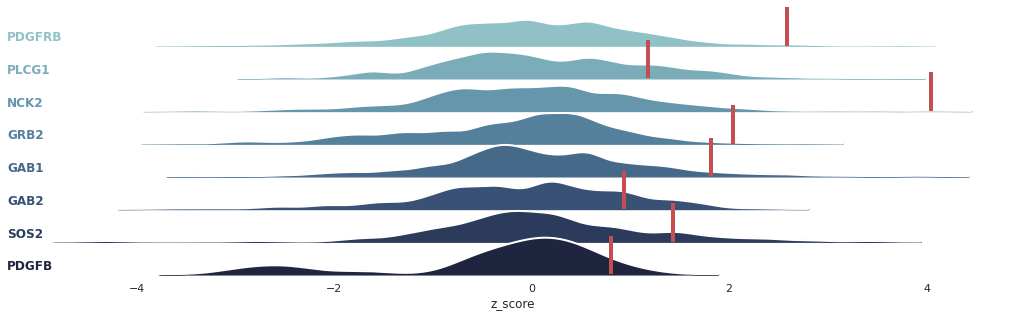

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(19.20,10.80))
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(8, rot=-.25, light=.7)
#pal = sns.cubehelix_palette("Spectral")
g = sns.FacetGrid(df, row="Protein_name", hue="Protein_name", aspect=25, height=.6, palette=pal)
# Draw the densities in a few steps
g.map(sns.kdeplot, "z_score", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "z_score", clip_on=False, color="w", lw=2, bw_adjust=.5)
## ADDING V_lines
axes = g.axes.flatten()
for i, ax in enumerate(axes):
    #axes[i].axvline(z_scores[i], ls='--')
    axes[i].axvline(z_scores[i], linewidth=4, color='r')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "z_score")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.15)
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
#
plt.savefig(f'{report_directory}/ridge_plot_fp.svg',dpi=300)